# Tensorflow Demo in Sagemaker Studio Lab

This notebook works with tf-plt kernel.
First Lets import some library

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

2022-03-06 01:12:17.603402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 01:12:17.603438: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
import matplotlib.pyplot as plt

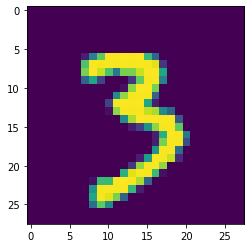

In [10]:
plt.imshow(x_test[30])

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

2022-03-06 01:12:35.626668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-06 01:12:35.626706: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-06 01:12:35.626731: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-03-06 01:12:35.626987: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1442 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9725
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0707 - accuracy: 0.9776


[0.07067447155714035, 0.9775999784469604]

In [8]:
import numpy as np

In [11]:
np.argmax(model.predict(np.reshape(x_test[30],(1,28,28))))

3

In [12]:
!nvidia-smi

/usr/bin/sh: 1: nvidia-smi: not found


In [ ]:
!cat /cpu/procin